求解RC回路放电的微分方程

0.005208116641398638


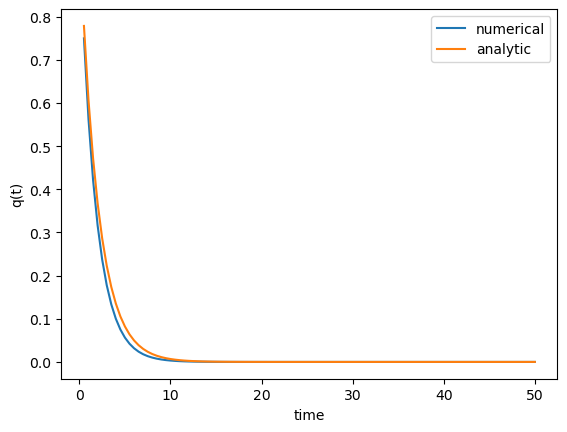

In [22]:
#欧拉法
import numpy as np
import matplotlib.pyplot as plt

rc = 2
dt = 0.5
n = 100
t = 0
q = 1
qt = []
qt_analytic = []
time = np.arange(dt, (n+1)*dt, dt)
error = []

for i in range(n):
    t += dt
    q -= q * dt / rc
    qt.append(q)
    q_analytic = np.exp(-t/rc)
    qt_analytic.append(q_analytic)
    error.append(abs(q - q_analytic))

print(np.mean(error))

plt.plot(time, qt, label='numerical')
plt.plot(time, qt_analytic, label='analytic')
plt.xlabel('time')
plt.ylabel('q(t)')
plt.legend()


0.0005061690722177362


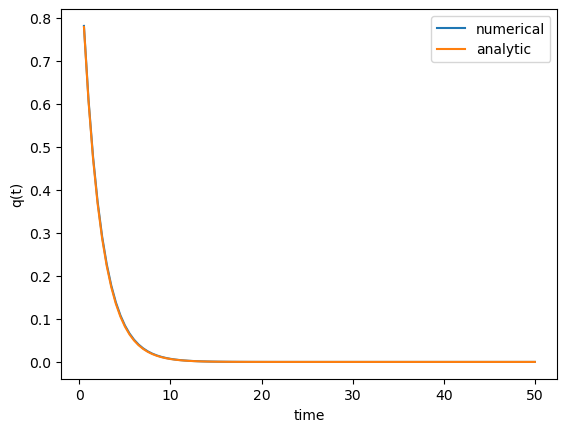

In [23]:
#改进的欧拉法
t = 0
q = 1
qt = []
qt_analytic = []
error = []

for i in range(n):
    t += dt
    q_prime = q - q * dt / rc
    q -= 0.5 * (q + q_prime) * dt / rc
    qt.append(q)
    qt_analytic.append(np.exp(-t/rc))
    error.append(abs(q - np.exp(-t/rc)))

print(np.mean(error))
plt.plot(time, qt, label='numerical')
plt.plot(time, qt_analytic, label='analytic')
plt.xlabel('time')
plt.ylabel('q(t)')
plt.legend()

0.0005061690722177362


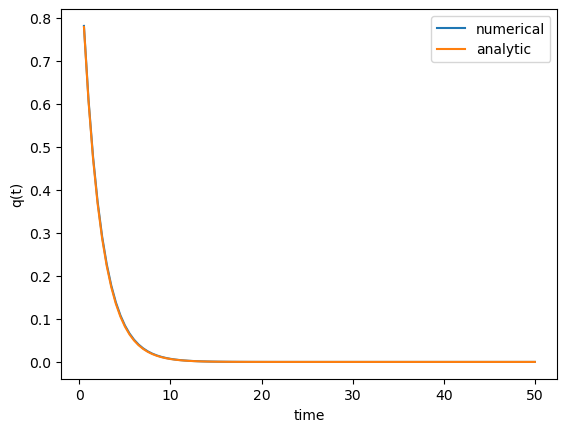

In [25]:
#二阶龙格-库塔法
t = 0
q = 1
qt = []
qt_analytic = []
error = []

for i in range(n):
    t += dt
    q_prime = q - 0.5 * q * dt / rc
    q -= q_prime * dt / rc
    qt.append(q)
    qt_analytic.append(np.exp(-t/rc))
    error.append(abs(q - np.exp(-t/rc)))

print(np.mean(error))
plt.plot(time, qt, label='numerical')
plt.plot(time, qt_analytic, label='analytic')
plt.xlabel('time')
plt.ylabel('q(t)')
plt.legend()

8.388003413413282e-05


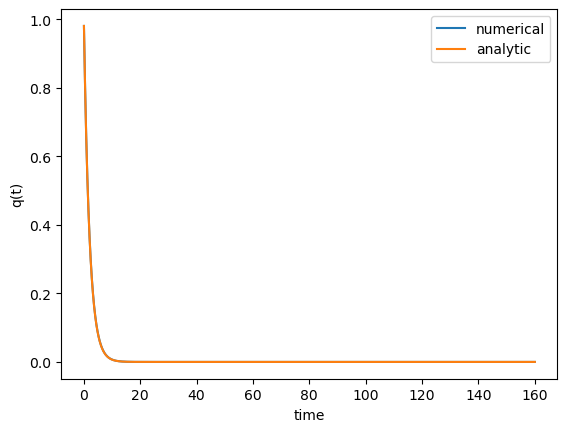

In [ ]:
#四阶龙格-库塔法
t = 0
q = 1
qt = []
qt_analytic = []
error = []

for i in range(n):
    t += dt
    k1 = - q / rc
    k2 = - (q + 0.5 * k1 * dt) / rc
    k3 = - (q + 0.5 * k2 * dt) / rc
    k4 = - (q + k3 * dt) /rc

    q += 1/6 * (k1 + 2*k2 + 2*k3 + k4) * dt
    qt.append(q)
    qt_analytic.append(np.exp(-t/rc))
    error.append(abs(q - np.exp(-t/rc)))

print(np.mean(error))
plt.plot(time, qt, label='numerical')
plt.plot(time, qt_analytic, label='analytic')
plt.xlabel('time')
plt.ylabel('q(t)')
plt.legend()

单摆运动：求解二阶常微分方程

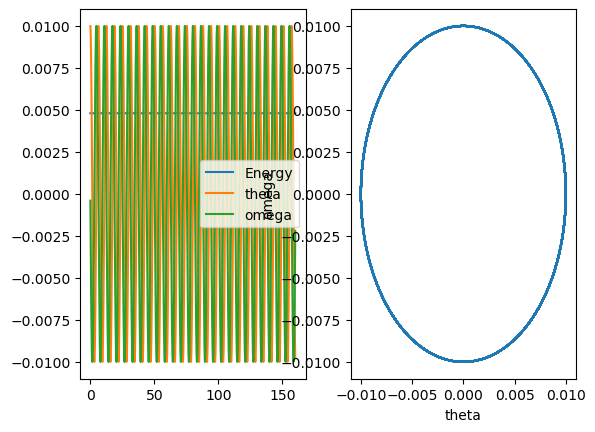

In [46]:
import numpy as numpy
import matplotlib.pyplot as plt

g = 9.8
l = 9.8
dt = 0.04
theta = 0.01
omega = 0
n = 4000
theta_t = []
omega_t = []
E_t = []
time = np.arange(dt, (n+1) * dt, dt)

def energy(theta, omega):
    return 1/2 * (l**2 * omega**2 + g * l * theta**2)

for i in range(n):
    t = time[i]

    k1_theta = omega
    k1_omega = -g/l * theta
    k2_theta = omega + k1_omega * dt / 2
    k2_omega = -g/l * (theta + k1_theta * dt / 2)
    k3_theta = omega + k2_omega * dt / 2
    k3_omega = -g/l * (theta + k2_theta * dt / 2)
    k4_theta = omega + k3_omega * dt
    k4_omega = -g/l * (theta + k3_theta * dt)

    theta += 1/6 * (k1_theta + 2 * k2_theta + 2 * k3_theta + k4_theta) * dt
    omega += 1/6 * (k1_omega + 2 * k2_omega + 2 * k3_omega + k4_omega) * dt

    omega_t.append(omega)
    theta_t.append(theta)
    E_t.append(energy(theta, omega))

plt.subplot(121)
plt.plot(time, E_t, label='Energy')
plt.plot(time, theta_t, label='theta')
plt.plot(time, omega_t, label='omega')
plt.legend()
plt.subplot(122)
plt.plot(theta_t, omega_t)
plt.xlabel('theta')
plt.ylabel('omega')
plt.show()

    
 

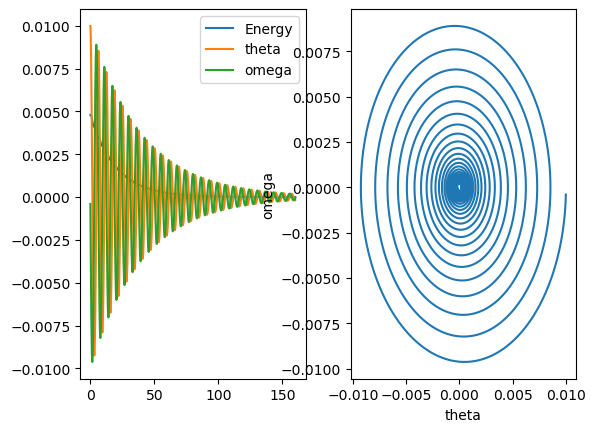

In [45]:
#有阻尼情况单摆
import numpy as numpy
import matplotlib.pyplot as plt

g = 9.8
l = 9.8
dt = 0.04
theta = 0.01
omega = 0
n = 4000
beta = 0.05
theta_t = []
omega_t = []
E_t = []
time = np.arange(dt, (n+1) * dt, dt)

def energy(theta, omega):
    return 1/2 * (l**2 * omega**2 + g * l * theta**2)

for i in range(n):
    t = time[i]

    k1_theta = omega
    k1_omega = -g/l * theta - beta * omega
    k2_theta = omega + k1_omega * dt / 2
    k2_omega = -g/l * (theta + k1_theta * dt / 2) - beta * (omega + k1_omega * dt / 2)
    k3_theta = omega + k2_omega * dt / 2
    k3_omega = -g/l * (theta + k2_theta * dt / 2) - beta * (omega + k2_omega * dt / 2)
    k4_theta = omega + k3_omega * dt
    k4_omega = -g/l * (theta + k3_theta * dt) - beta * (omega + k3_omega * dt)

    theta += 1/6 * (k1_theta + 2 * k2_theta + 2 * k3_theta + k4_theta) * dt
    omega += 1/6 * (k1_omega + 2 * k2_omega + 2 * k3_omega + k4_omega) * dt

    omega_t.append(omega)
    theta_t.append(theta)
    E_t.append(energy(theta, omega))

plt.subplot(121)
plt.plot(time, E_t, label='Energy')
plt.plot(time, theta_t, label='theta')
plt.plot(time, omega_t, label='omega')
plt.legend()
plt.subplot(122)
plt.plot(theta_t, omega_t)
plt.xlabel('theta')
plt.ylabel('omega')
plt.show()

    
 